In [48]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import numpy as np
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv('D:\\python\\Titanic_ML\\sentiment\\sample_submission_null.csv')

In [8]:
sw=stopwords.words('english')
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [9]:
print("length of the words", len(sw))

length of the words 179


In [14]:
def remove_punctuation(comment):
    import string
    translator=str.maketrans('', '', string.punctuation)
    return comment.translate(translator)

In [12]:
df.columns

Index(['Insult', 'Date', 'Comment'], dtype='object')

In [15]:
df['Comment']=df['Comment'].apply(remove_punctuation)
df.head(10)

,Insult,Date,Comment
0,0,NaN,THE DRUDGE REPORTnnnnYou wont see this story o...
1,0,20120618222256Z,ian21xa0Roger Clemens is the fucking man and n...
2,0,20120618213617Z,Agree with Alan you are an extremest idiot Y...
3,0,NaN,ReallynnI see Marc Lamont Hill on various prog...
4,0,20120620003825Z,Really suck isnt the word when many of our nuc...
5,0,NaN,after a couple guys like him rape him first
6,0,20120529201500Z,Matthews mentored Perry at USC Bodes well
7,0,20120619145613Z,How about we accept facts and patiently wait f...
8,0,20120609165037Z,To engage in an intelligent debate with you is...
9,0,20120612145537Z,Same reason no one cared Obama did cocaine whi...


In [18]:
def remove_stopwords(comment):
    comment=[word.lower() for word in comment.split() if word.lower() not in sw]
    return ",".join(comment)

In [19]:
df['Comment']=df['Comment'].apply(remove_stopwords)
df.head()

,Insult,Date,Comment
0,0,NaN,"drudge,reportnnnnyou,wont,see,story,foxfag,for..."
1,0,20120618222256Z,"ian21xa0roger,clemens,fucking,man,never,fuckin..."
2,0,20120618213617Z,"agree,alan,extremest,idiot,american,native,ame..."
3,0,NaN,"reallynni,see,marc,lamont,hill,various,program..."
4,0,20120620003825Z,"really,suck,isnt,word,many,nuclear,power,plant..."


In [21]:
count_vectorizer=CountVectorizer()
count_vectorizer.fit(df['Comment'])
dictonary=count_vectorizer.vocabulary_.items()

In [22]:
vocab=[]
count=[]

for key, val in dictonary:
    vocab.append(key)
    count.append(val)
    
vocab_bef_stem=pd.Series(count, index=vocab)
vocab_bef_stem=vocab_bef_stem.sort_values(ascending=False)

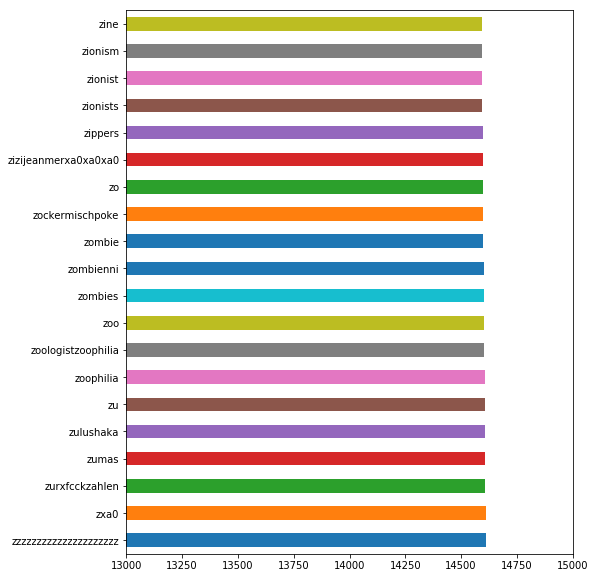

In [35]:
top_vocabs=vocab_bef_stem.head(20)
top_vocabs.plot(kind='barh', figsize=(8,10), xlim=(13000, 15000))
plt.show()

In [40]:

stemmer=SnowballStemmer('english')

def stemming(comment):
    text=[stemmer.stem(word) for word in comment.split()]
    return ''.join(comment)

In [41]:
df['Comment']=df['Comment'].apply(stemming)
df.head(10)

,Insult,Date,Comment
0,0,NaN,"d r u d g e , r e p o r t n n n n y o u , w o ..."
1,0,20120618222256Z,"i a n 2 1 x a 0 r o g e r , c l e m e n s , f ..."
2,0,20120618213617Z,"a g r e e , a l a n , e x t r e m e s t , i d ..."
3,0,NaN,"r e a l l y n n i , s e e , m a r c , l a m o ..."
4,0,20120620003825Z,"r e a l l y , s u c k , i s n t , w o r d , m ..."
5,0,NaN,"c o u p l e , g u y s , l i k e , r a p e , f ..."
6,0,20120529201500Z,"m a t t h e w s , m e n t o r e d , p e r r y ..."
7,0,20120619145613Z,"a c c e p t , f a c t s , p a t i e n t l y , ..."
8,0,20120609165037Z,"e n g a g e , i n t e l l i g e n t , d e b a ..."
9,0,20120612145537Z,"r e a s o n , o n e , c a r e d , o b a m a , ..."


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2647 entries, 0 to 2646
Data columns (total 3 columns):
Insult     2647 non-null int64
Date       2123 non-null object
Comment    2647 non-null object
dtypes: int64(1), object(2)
memory usage: 62.1+ KB


In [54]:
train=pd.read_csv('D:\\python\\Titanic_ML\\sentiment\\train.csv', parse_dates=["Date"])

In [55]:
train.head(10)

,Insult,Date,Comment
0,1,2012-06-18 19:21:55,"""You fuck your dad."""
1,0,2012-05-28 19:22:15,"""i really don't understand your point.\xa0 It ..."
2,0,NaT,"""A\\xc2\\xa0majority of Canadians can and has ..."
3,0,NaT,"""listen if you dont wanna get married to a man..."
4,0,2012-06-19 09:47:53,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd..."
5,0,2012-06-20 17:12:26,"""@SDL OK, but I would hope they'd sign him to ..."
6,0,2012-05-03 01:26:28,"""Yeah and where are you now?"""
7,1,NaT,"""shut the fuck up. you and the rest of your fa..."
8,1,2012-05-02 17:35:53,"""Either you are fake or extremely stupid...may..."
9,1,2012-06-20 16:05:12,"""That you are an idiot who understands neither..."


In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3947 entries, 0 to 3946
Data columns (total 3 columns):
Insult     3947 non-null int64
Date       3229 non-null datetime64[ns]
Comment    3947 non-null object
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 92.6+ KB


In [57]:
train.Insult.value_counts()

0    2898
1    1049
Name: Insult, dtype: int64

In [59]:
train.Date.isnull().value_counts()

False    3229
True      718
Name: Date, dtype: int64

In [61]:
train['Comment']=train['Comment'].apply(remove_punctuation)
train.head(10)

,Insult,Date,Comment
0,1,2012-06-18 19:21:55,You fuck your dad
1,0,2012-05-28 19:22:15,i really dont understand your pointxa0 It seem...
2,0,NaT,Axc2xa0majority of Canadians can and has been ...
3,0,NaT,listen if you dont wanna get married to a man ...
4,0,2012-06-19 09:47:53,Cxe1c bu1ea1n xuu1ed1ng u0111u01b0u1eddng biu1...
5,0,2012-06-20 17:12:26,SDL OK but I would hope theyd sign him to a on...
6,0,2012-05-03 01:26:28,Yeah and where are you now
7,1,NaT,shut the fuck up you and the rest of your fagg...
8,1,2012-05-02 17:35:53,Either you are fake or extremely stupidmaybe both
9,1,2012-06-20 16:05:12,That you are an idiot who understands neither ...


In [62]:
train['Comment']=train['Comment'].apply(remove_stopwords)
train.head(10)

,Insult,Date,Comment
0,1,2012-06-18 19:21:55,"fuck,dad"
1,0,2012-05-28 19:22:15,"really,dont,understand,pointxa0,seems,mixing,a..."
2,0,NaT,"axc2xa0majority,canadians,wrong,againnnunless,..."
3,0,NaT,"listen,dont,wanna,get,married,man,women,dont,w..."
4,0,2012-06-19 09:47:53,"cxe1c,bu1ea1n,xuu1ed1ng,u0111u01b0u1eddng,biu1..."
5,0,2012-06-20 17:12:26,"sdl,ok,would,hope,theyd,sign,oneyear,contract,..."
6,0,2012-05-03 01:26:28,yeah
7,1,NaT,"shut,fuck,rest,faggot,friends,burned,stake"
8,1,2012-05-02 17:35:53,"either,fake,extremely,stupidmaybe"
9,1,2012-06-20 16:05:12,"idiot,understands,neither,taxation,womens,health"


In [64]:
count_vectorizer=CountVectorizer()
count_vectorizer.fit(train['Comment'])
dictonary=count_vectorizer.vocabulary_.items()

In [65]:
vocab=[]
count=[]

for key, val in dictonary:
    vocab.append(key)
    count.append(val)
    
vocab_bef_stem=pd.Series(count, index=vocab)
vocab_bef_stem=vocab_bef_stem.sort_values(ascending=False)

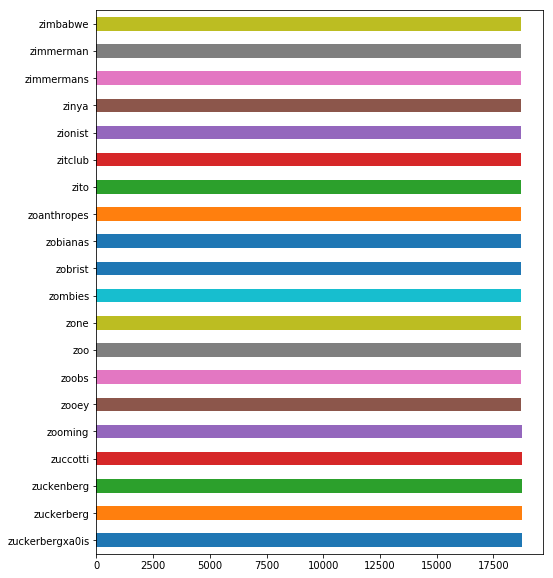

In [67]:
top_vocabs=vocab_bef_stem.head(20)
top_vocabs.plot(kind='barh', figsize=(8,10))
plt.show()

In [68]:
stemmer=SnowballStemmer('english')

def stemming(comment):
    text=[stemmer.stem(word) for word in comment.split()]
    return " ".join(comment)

In [69]:
train['Comment']=train['Comment'].apply(stemming)
train.head(10)

,Insult,Date,Comment
0,1,2012-06-18 19:21:55,"f u c k , d a d"
1,0,2012-05-28 19:22:15,"r e a l l y , d o n t , u n d e r s t a n d , ..."
2,0,NaT,"a x c 2 x a 0 m a j o r i t y , c a n a d i a ..."
3,0,NaT,"l i s t e n , d o n t , w a n n a , g e t , m ..."
4,0,2012-06-19 09:47:53,"c x e 1 c , b u 1 e a 1 n , x u u 1 e d 1 n g ..."
5,0,2012-06-20 17:12:26,"s d l , o k , w o u l d , h o p e , t h e y d ..."
6,0,2012-05-03 01:26:28,y e a h
7,1,NaT,"s h u t , f u c k , r e s t , f a g g o t , f ..."
8,1,2012-05-02 17:35:53,"e i t h e r , f a k e , e x t r e m e l y , s ..."
9,1,2012-06-20 16:05:12,"i d i o t , u n d e r s t a n d s , n e i t h ..."
